# Project Idea 1: Maps of Meaning - Quantifying Cultural Relativism with Word Embeddings

## Introduction

Write some introductory words that motivate the research question in the next subsection. Example:


A common problem in communication is that meanings associated to words and phrases differ slightly from person to person, and even more so between (scientific) communities, populations and cultures. Word embeddings bear the potential to quantify those differences due to comprehensive contextualization of words. The text book example for cultural relativism is the concept of "human rights", that in Eastern cultures is more focused on the greater good of the community, whereas Western definitions of the word focus more on the human right of the individual (wikipedia, "cultural relativism"). While these subtleties have been recognized anecdotically and usually in a qualitative fashion, it is desirable to identify these issues comprehensively in a measurable, reproducible and algorithmic way.  

The abovementioned communication caveats deserve awareness in all processes that involve communication, such as diplomatic conversations, but also in language translation or interdisciplinary exchanges between scientific communities.


## Objective
Pose a research question. For the current project idea, this could be something along the lines of: 
Are there words that are seemingly equivalent but have different , either in the same language by different groups of speakers or across languages?

 ## Methodology
 
 * Retrieve suitable corpora representing two or more groups of speakers (multilingual or same language)
     - Shakespeare vs. Twain
     - Americans vs. English
     - English vs Arabic
 * If you use different languages, you can create links between equivalent words using WordNet (see below) or spaCy
 * Use for example Bert/DistilBert to get more than one _contextual_ embedding per word and speaker-group
 * Hierarchical clustering of Word Embeddings as used by different cultures (see Vector semantics lab)
 * Cluster analysis (hierarchical clustering, cluster coefficients like Dunn/Silhouette or homogenity vs separation)
 * Visualization (PCA, tSNE)
 
 (this would be combined with Python cells that do the actual job)

Formal explanations and any math benefits from $\LaTeX$ usage. A small example:

$\sum_{i=1}^n \frac{i^2}{i+1}$

## Results
After conducting above methods, provide appriate figures and comment on the results. Take inspiration from the provided notebooks during this class

## Conclusion
Your project should finish with a short take-home message.

# Project Idea 2: Ontology-based Parallelogram tests in Word-Embedding Models

A relatively simple project idea is to improve analogy tests by 
Notice though, if you go into other languages, it might get tricky due to incomplete translations (Bratwurst is - outrageously - not part of the Multilingual WordNet).
Gensim has an evaluation benchmark, that you can use.

### WordNet
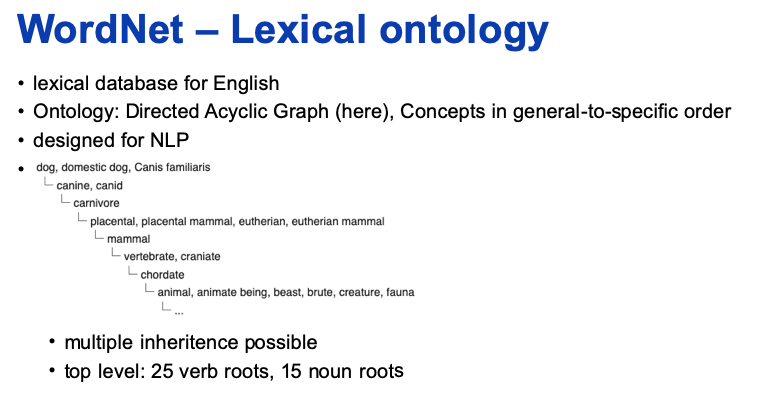
A central term in WordNet is a synset, well explained for example here: https://www.geeksforgeeks.org/nlp-synsets-for-a-word-in-wordnet/

WordNet contains for many words the different uses, called synsets. They can be differentiated by noun, verb etc.

In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
from nltk.corpus import wordnet as wn
import nltk
import networkx as nx
import matplotlib.pyplot as plt
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahenschel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
wn.synsets('islam')

[Synset('islam.n.01'), Synset('islam.n.02')]

### Hypernyms
Hypernyms are abstractions of terms, like a dog is a mammal, which is an animal. This type of information can be used to improve analogy tests.

In [14]:
for ss in wn.synsets('islam'):
    print (ss.definition(), ss.examples(), ss.hypernyms(), )   

the civilization of Muslims collectively which is governed by the Muslim religion ['Islam is predominant in northern Africa, the Middle East, Pakistan, and Indonesia'] [Synset('civilization.n.01')]
the monotheistic religious system of Muslims founded in Arabia in the 7th century and based on the teachings of Muhammad as laid down in the Koran ['Islam is a complete way of life, not a Sunday religion', 'the term Muhammadanism is offensive to Muslims who believe that Allah, not Muhammad, founded their religion'] [Synset('monotheism.n.01')]


### Multilingual WordNet

In [374]:
for cat in wn.synsets('cat'):
    arabic = cat.lemma_names('arb')
    if True:
        print(cat.name())           
        print(cat.definition())     
        print(cat.examples())
        print(arabic) ## translation of this particular synset
        print('-'*50)

cat.n.01
feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
[]
['قِطّ', 'قِطّة', 'هِرّ', 'هِرّة']
--------------------------------------------------
guy.n.01
an informal term for a youth or man
['a nice guy', "the guy's only doing it for some doll"]
[]
--------------------------------------------------
cat.n.03
a spiteful woman gossip
['what a cat she is!']
[]
--------------------------------------------------
kat.n.01
the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant
['in Yemen kat is used daily by 85% of adults']
[]
--------------------------------------------------
cat-o'-nine-tails.n.01
a whip with nine knotted cords
['British sailors feared the cat']
[]
--------------------------------------------------
caterpillar.n.02
a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work
[]
[]
--------

### The best of two worlds: Combining Vector Semantics and WordNet


In [379]:
def inWordNet(word, hasTranslation='arb'):
    for ss in wn.synsets(word):
        if not hasTranslation: return True
        translation = ss.lemma_names(hasTranslation)
        if translation: return translation
def inWordNetWhypernym(word):
    '''True if at least one synset has at least one hypernym'''
    for ss in wn.synsets(word):
        if ss.hypernyms(): return True
    return False
        

#### How many terms are in glove and wordnet?
(and have at least one hypernym)

In [380]:
len([word for word in glove.index_to_key if inWordNetWhypernym(word)])

68128

#### How many wordnet terms have a hypernym?

In [147]:
taxnouns = [word for word in wn.all_synsets(pos='n') if word.hypernyms()]
len(taxnouns)

74389

In [381]:
#### Exploring hypernym paths all the way to the top

In [156]:
def pp(hp):
    print('/'.join([ss.name().split('.')[0] for ss in hp]))

dog = wn.synsets('dog')[0]
for hp in dog.hypernym_paths():
    pp(hp)

entity/physical_entity/object/whole/living_thing/organism/animal/chordate/vertebrate/mammal/placental/carnivore/canine/dog
entity/physical_entity/object/whole/living_thing/organism/animal/domestic_animal/dog


In [91]:
k = [word for word in glove.index_to_key if inWordNet(word)]
len(k)

21471

In [90]:
e = [word for word in glove.index_to_key if inWordNet(word, hasTranslation=None)]
len(e)

85772

### Translations with Multilingual WordNet

In [327]:
for language in wn.langs():
    translation = wn.synsets('football')[0].lemma_names(language)
    if translation:
        print(f'{str(translation):<50}: {language}')

['football', 'football_game']                     : eng
['futboll', 'lojë_futbolli']                      : als
['كُرة_قدم', 'لُعْبة_كُرة_القدم']                 : arb
['футбол']                                        : bul
['橄榄球', '球类运动', '足球']                             : cmn
['jalkapallo', 'jalkapallo-ottelu']               : fin
['ballon', 'foot', 'football', 'soccer']          : fra
['GAP!']                                          : heb
['nogomet']                                       : hrv
['fótbolti', 'knöttur']                           : isl
['football']                                      : ita
['フットボール', 'フートボール', '蹴球']                        : jpn
['futbol_(homonímia)']                            : cat
['futbol']                                        : eus
['fútbol']                                        : spa
['sepak_bola']                                    : ind
['bola_sepak']                                    : zsm
['voetbal', 'voetballen']                       

In [41]:
trustAR = 'وَدِيعَة'
wn.synsets(trustAR, lang='arb')

[Synset('fund.n.01'), Synset('trust.n.01')]

In [371]:
spy = wn.synset('spy.n.01').lemma_names('arb')[0]
spy

'جاسُوس'

In [317]:
for language in wn.langs():
    print(language, len(list(wn.all_synsets(lang=language))))

eng 117659
als 4675
arb 9916
bul 4959
cmn 42300
dan 4476
ell 18049
fin 116763
fra 59091
heb 5448
hrv 23115
isl 4951
ita 35001
ita_iwn 15563
jpn 57184
cat 45826
eus 29413
glg 19311
spa 38512
ind 38085
zsm 36911
nld 30177
nno 3671
nob 4455
pol 33826
por 43895
ron 56026
lit 9462
slk 18507
slv 42583
swe 6796
tha 73350


In [47]:
import gensim.downloader as api
glove = api.load('glove-wiki-gigaword-200')

Analogies like king-man+woman ~= queen are better implemented like below.

In [48]:
glove.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.6978678703308105),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754891395569),
 ('throne', 0.5775108933448792),
 ('prince', 0.5750998258590698),
 ('elizabeth', 0.546359658241272),
 ('daughter', 0.5399125814437866),
 ('kingdom', 0.5318052768707275),
 ('mother', 0.5168544054031372),
 ('crown', 0.5164472460746765)]

In [202]:
# better with POS tagging
wn.morphy('has')

'ha'

In [53]:
x = glove['king']+glove['woman']-glove['man']
glove.similar_by_vector(x)

[('king', 0.8209066987037659),
 ('queen', 0.7119165658950806),
 ('princess', 0.6121214628219604),
 ('monarch', 0.6024807095527649),
 ('prince', 0.596004068851471),
 ('throne', 0.5915314555168152),
 ('daughter', 0.558805525302887),
 ('elizabeth', 0.554740309715271),
 ('kingdom', 0.5494517087936401),
 ('mother', 0.5419816970825195)]

#### Glove/Word2vec failures 
Below are a few examples were the analogy goes wrong. This could be better with some form of "type"-checking.

In [125]:
## only spaetzle and currywurst are foods, and not even pastry
glove.most_similar(positive=['croissant', 'germany'], negative=['france'])

[('lindenau', 0.4404163658618927),
 ('krefeld', 0.43451571464538574),
 ('pokal', 0.43357959389686584),
 ('delitzsch', 0.43294915556907654),
 ('naumburg', 0.4279038608074188),
 ('spaetzle', 0.4276801645755768),
 ('meißen', 0.42647895216941833),
 ('steffen', 0.42207497358322144),
 ('currywurst', 0.42193707823753357),
 ('recklinghausen', 0.4218331277370453)]

In [162]:
#x = -glove['japan'] + glove['sushi']+glove['germany']
glove.most_similar(positive=['sushi', 'uae'], negative=['japan'])
#glove.similar_by_vector(x)

[('nahyan', 0.5181387662887573),
 ('caviar', 0.47783181071281433),
 ('paella', 0.4497394263744354),
 ('nahayan', 0.44313961267471313),
 ('zayed', 0.432124525308609),
 ('omani', 0.4285220801830292),
 ('seafood', 0.4279175102710724),
 ('saif', 0.4260007441043854),
 ('dirham', 0.4214130640029907),
 ('sashimi', 0.416593462228775)]


Sushi, paella and caviar are all recognized as food by WordNet, but not by GloVe.
Try to fix this. "What Sushi is to Japan, is caviar to UAE" is probably a bit off (paella definitely is), but it is less wrong then nahyan.


In [382]:
## WordNet recognized paella as food
wn.synsets('paella')[0].hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('matter.n.03'),
  Synset('substance.n.07'),
  Synset('food.n.01'),
  Synset('nutriment.n.01'),
  Synset('dish.n.02'),
  Synset('paella.n.01')]]

Paella in Catalan: slightly different hypernym path

In [321]:
paella = wn.synsets('paella', lang='cat')[0]
paella.hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('implement.n.01'),
  Synset('utensil.n.01'),
  Synset('kitchen_utensil.n.01'),
  Synset('cooking_utensil.n.01'),
  Synset('pan.n.01'),
  Synset('frying_pan.n.01')]]

In [85]:
## the longest word that is not a link and has some entropy (at least n different letters)
import re
link = re.compile('^http(s)?://')
max((word for word in glove.index_to_key if len(set(word))>5 and not link.match(word)), key=lambda x: len(x))


'schleswig-holstein-sonderburg-augustenburg'

# Project Idea 3: Hierarchical Word Mover Distance

Here you are given a scaffold of code, that can still be improved upon.

The original Word Mover Distance goes back to Matt Kusner et al., 2018.
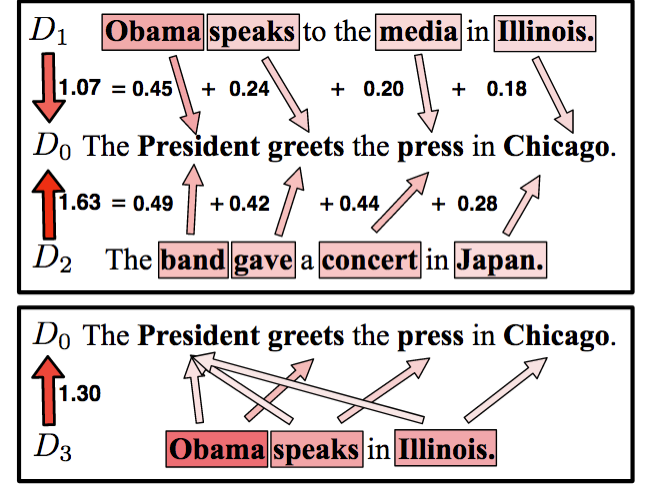

See https://radimrehurek.com/gensim/auto_examples/tutorials/run_wmd.html
and lecture slides.

https://radimrehurek.com/gensim/auto_examples/tutorials/run_wmd.html

WMD is $O(n^3\mathop{log}n)$ 😧. On the other hand, if we have a hierarchy over our words, EMDUnifrac is only $O(n)$ 🤩! We also wouldn't need stopword removal, as we just go with what's in WordNet. 
Below is a way to compare documents using 'hierarchical' Word Mover Distance instead, as explained in the lecture.
Possible improvements could be 
* word sense disambiguation (currently handled by greedily using the first synset).
* introduce branch length to the hypernym graph base on word2vec/glove distances of associated words.
* for multiple inheritence, currently the weight to parent nodes is equal (i.e. 2 parents: a node inherits 50\% from each)
* vocabulary extension: in order to deal with many words from glove, connect each word to a leave node of the WordNet tree
* use spacy's nlp (extremely simple and convenient pipeline) for the creation of document distributions along the leave nodes of the hypernym graph

In order to compare two documents, other suggestions have been made (including TF-IDF based metrics), see Kusner paper.
Jurafsky suggests another method, word embedding based:
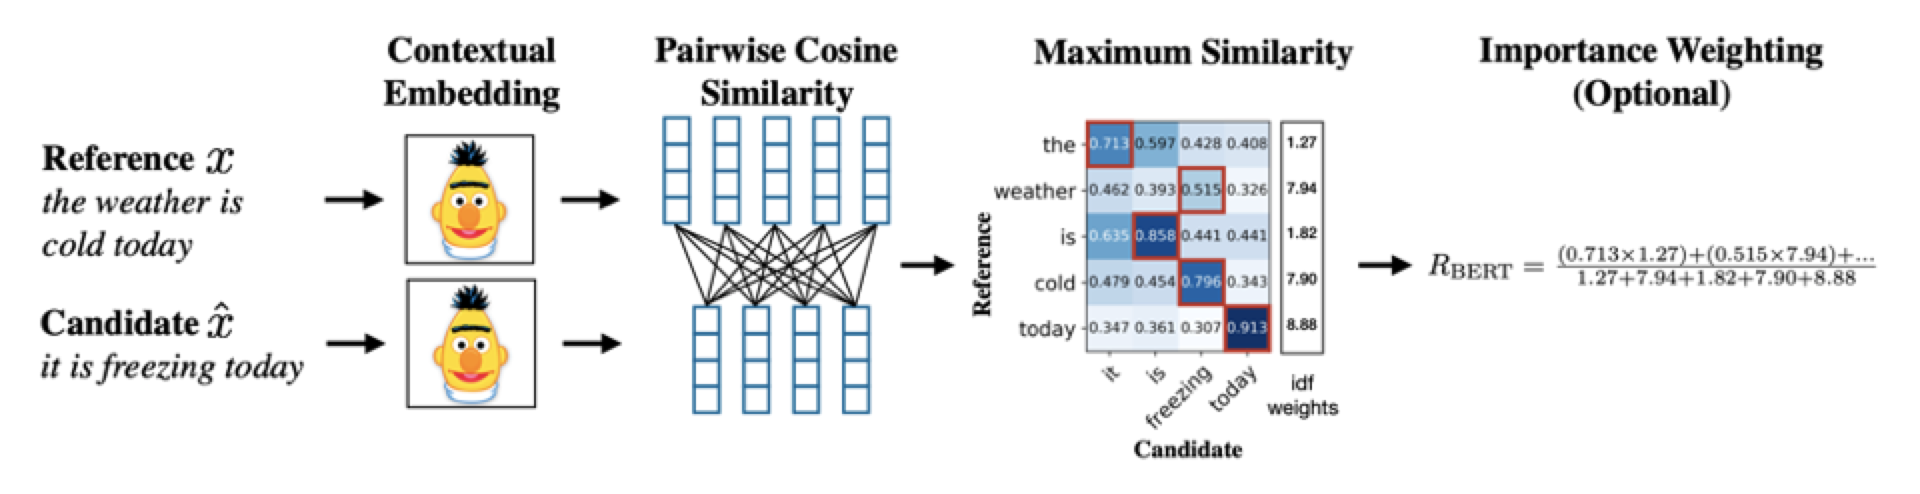

In [358]:
islam = wn.synsets('islam')
islam

[Synset('islam.n.01'), Synset('islam.n.02')]

In [356]:
islam.hypernyms()

[Synset('monotheism.n.01')]

In [109]:
hypo = lambda s: s.hyponyms()
hyper = lambda s: s.hypernyms()

In [108]:
list(islam.closure(hypo))

[Synset('mahdism.n.01'),
 Synset('salafism.n.01'),
 Synset('shiism.n.01'),
 Synset('wahhabism.n.01'),
 Synset('ismailism.n.01')]

In [110]:
## transitive closure of hypernyms
## i.e. all hypernyms, and their hypernyms etc.
list(islam.closure(hyper))

/Users/ahenschel/Applications/miniconda3/envs/speech/lib/python3.9/site-packages/nltk/corpus/reader/wordnet.py:599: UserWarning: Discarded redundant search for Synset('abstraction.n.06') at depth 11
  for synset in acyclic_breadth_first(self, rel, depth):


[Synset('monotheism.n.01'),
 Synset('theism.n.01'),
 Synset('religion.n.01'),
 Synset('belief.n.01'),
 Synset('theological_virtue.n.01'),
 Synset('content.n.05'),
 Synset('cardinal_virtue.n.01'),
 Synset('cognition.n.01'),
 Synset('virtue.n.04'),
 Synset('psychological_feature.n.01'),
 Synset('good.n.02'),
 Synset('abstraction.n.06'),
 Synset('morality.n.01'),
 Synset('entity.n.01'),
 Synset('quality.n.01'),
 Synset('attribute.n.02')]

In [192]:
wn.synsets('president')

[Synset('president.n.01'),
 Synset('president_of_the_united_states.n.01'),
 Synset('president.n.03'),
 Synset('president.n.04'),
 Synset('president.n.05'),
 Synset('president_of_the_united_states.n.02')]

In [285]:
## Converting entire WordNet to networkx DAG
## adapted from https://stackoverflow.com/questions/39824133/networkx-and-wordnet

def closure_graph(fn, synsets=None):
    seen = set()
    graph = nx.DiGraph()
    if synsets is None: synsets = list(wn.all_synsets())
    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)
    
    for synset in synsets:
        recurse(synset)
    return graph
 
WN = closure_graph(lambda s: s.hypernyms())


True

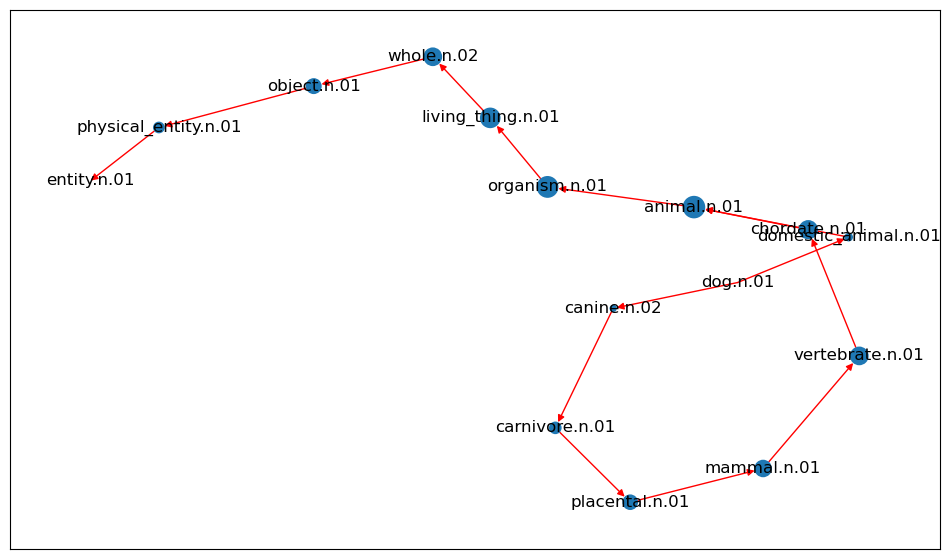

In [387]:
## transitive closure for 'dog' hypernyms, which is shown to be a DAG (last line)
dog = wn.synsets('dog')[0]
G = closure_graph(lambda s: s.hypernyms(), synsets=[dog])
index = nx.betweenness_centrality(G)
plt.rc('figure', figsize=(12, 7))
node_size = [index[n]*1000 for n in G]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_size, edge_color='r', linewidths=0)
nx.is_directed_acyclic_graph(WN)

In [266]:
## EMDUnifrac implementation, see emduhier.py, main has a toy example for usage
from emduhier import EMDDAG
WNDAG = EMDDAG(WN)
WNDAG.addWeights()

In [274]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import wordnet
from collections import Counter

flatten = lambda l: [item for sublist in l for item in sublist]

lemma = WordNetLemmatizer().lemmatize
morphy_tag = {'NN':wordnet.NOUN,'JJ':wordnet.ADJ,'VB':wordnet.VERB,'RB':wordnet.ADV} #[penn_tag[:2]]

class Doc:
    def __init__(self, doc, prep=True):
        self.doc = doc
        if prep: self.prep()
    def prep(self):  
        def lem(word, tag):
            wnTag = morphy_tag[tag[:2]]
            return (lemma(word, wnTag), wnTag)
        synsets = []
        for sent in sent_tokenize(self.doc):
            doc1 = word_tokenize(sent)
            doc1T = nltk.pos_tag(doc1)
            ## lemmatize with the help of pos tags
            lemmas = [lem(word, tag) for word, tag in doc1T if tag[:2] in morphy_tag]
            ## very greedily going with the first synset, improvable
            for word, tag in lemmas:
                synsets += wn.synsets(word, pos=tag)[:1]
        synsetsC = Counter([synset.name() for synset in synsets])
        self.dist = {k:v/len(synsets) for k,v in synsetsC.items()}
 

In [384]:
## simple comparison test. 
doc1 = Doc('the weather is cold today. I had to put a winter jacket on. I hate this weather.')
doc2 = Doc('it is freezing today. it is good to dress with some warm cloth.')
doc3 = Doc('Not sure they deliver into the UAE, but we discussed this earlier.')

doc4_ = '''The Dome of the Rock (Arabic: قبة الصخرة, romanized: Qubbat aṣ-Ṣakhra) is an Islamic shrine located on the Temple Mount in the Old City of Jerusalem, a site also known to Muslims as the al-Haram al-Sharif or the Al-Aqsa Compound. Its initial construction was undertaken by the Umayyad Caliphate on the orders of Abd al-Malik during the Second Fitna in 691–692 CE, and it has since been situated on top of the site of the Second Jewish Temple (built in c. 516 BCE to replace the destroyed Solomon's Temple), which was destroyed by the Romans in 70 CE. The original dome collapsed in 1015 and was rebuilt in 1022–23. The Dome of the Rock is the world's oldest surviving work of Islamic architecture.[1][2]

Its architecture and mosaics were patterned after nearby Byzantine churches and palaces,[3] although its outside appearance was significantly changed during the Ottoman period and again in the modern period, notably with the addition of the gold-plated roof, in 1959–61 and again in 1993. The octagonal plan of the structure may have been influenced by the Byzantine-era Church of the Seat of Mary (also known as Kathisma in Greek and al-Qadismu in Arabic), which was built between 451 and 458 on the road between Jerusalem and Bethlehem.[3]'''

doc5_ = '''Islamic architecture comprises the architectural styles of buildings associated with Islam. It encompasses both secular and religious styles from the early history of Islam to the present day. The Islamic world encompasses a wide geographic area historically ranging from western Africa and Europe to eastern Asia. Certain commonalities are shared by Islamic architectural styles across all these regions, but over time different regions developed their own styles according to local materials and techniques, local dynasties and patrons, different regional centers of artistic production, and sometimes different religious affiliations.[1][2]

Early Islamic architecture was influenced by Roman, Byzantine, Iranian, and Mesopotamian architecture and all other lands which the Early Muslim conquests conquered in the seventh and eighth centuries.[3][4][5][6][7] Further east, it was also influenced by Chinese and Indian architecture as Islam spread to South and Southeast Asia. Later it developed distinct characteristics in the form of buildings and in the decoration of surfaces with Islamic calligraphy, arabesques, and geometric motifs.[8] New architectural elements like minarets, muqarnas, and multifoil arches were invented. Common or important types of buildings in Islamic architecture include mosques, madrasas, tombs, palaces, hammams (public baths), Sufi hospices (e.g. khanqahs or zawiyas), fountains and sabils, commercial buildings (e.g. caravanserais and bazaars), and military fortifications.[2]'''
doc4 = Doc(doc4_)
doc5 = Doc(doc5_)
#print(doc5.dist)
WNDAG.distance(doc2.dist, doc1.dist)
WNDAG.distance(doc2.dist, doc4.dist) ## doc2 is almost as close to doc4 as it is to doc1 - to be debugged.


4.65

<AxesSubplot:>

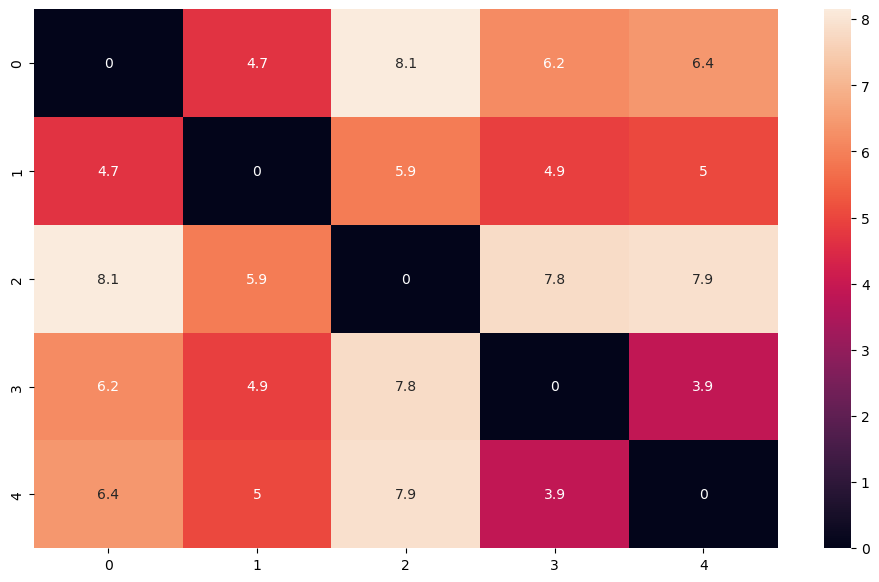

In [367]:
## pairwaise comparison of 5 documents
import pandas as pd
import numpy as np
import seaborn as sns
def pdist(docs, sim):
    dist = np.zeros((len(docs), len(docs)))
    for i, doc1 in enumerate(docs):
        for j, doc2 in enumerate(docs[:i+1]):
            dist[i,j] = dist[j,i] =sim(doc1, doc2)
    return dist
emdu = lambda d1, d2: WNDAG.distance(d1.dist, d2.dist)
sns.heatmap(pdist([doc1, doc2, doc3, doc4, doc5], emdu), annot=True)